# International Sports Events: Window Dressing and Repression

This is the second assignment of the Applied Machine Learning course. In this assignment we will replicate partly a study on the relationship between repression in autocratic regimes and international sports events:

- Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18. https://doi.org/10.1017/S0003055422000958.

---

> John Papadatos, Undergraduate Student <br>
> Department of Management Science and Technology <br>
> Athens University of Economics and Business <br>
> t8190314@aueb.gr

---

- First of all make sure that the following Python packages are installed.


- If some packages missing you can install them using the following command: <br>
  `pip install <package-name>` or `pip3 install <package-name>`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

- By default Pandas will truncate the middle columns if our DataFrame have more than 20.


- We will revoke the maximum number of columns by setting it to None.

In [2]:
pd.set_option("display.max_columns", None)

## Q1: Overview

For the first question, we will first replicate Tables SI.3.1. and SI.3.2. of the Supporting Information just to make sure we have the right data. Then we will replicate Figure 1 of the main paper and Figure SI.1.1 from the Supporting Information.

- The Supporting Information can be found [here](https://static.cambridge.org/content/id/urn:cambridge.org:id:article:S0003055422000958/resource/name/S0003055422000958sup001.pdf).

---

- The data are available for download at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I.

In [3]:
df = pd.read_csv('data/main_data.tab', sep='\t')
df.head()

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,date,month_date,prewc_time3m,time,time2,time3,time_long,time2_long,time3_long,hostcitytime,hostcitytime2,hostcitytime3,hostcitytime_long,hostcitytime2_long,hostcitytime3_long,prox_hotelonly,prox_hotelonly_time,prox_hotelonly_time2,prox_hotelonly_time3,prox_hotelpress,prox_hotelpress_time,prox_hotelpress_time2,prox_hotelpress_time3,postwc_time3mdum,time_postwc,time2_postwc,time3_postwc,lnpop_1970,literacy_avg,vote_frejuli,lnrebact1974,lnrepression70_77,latitude,lnstrikes,lnlag_strikes,lnlag2_strikes,biweek1,biweek2,biweek3,biweek4,biweek5,biweek6,biweek7,biweek8,biweek9,biweek10,biweek11,biweek12,biweek13,biweek14,biweek15,hcXbiweek1,hcXbiweek2,hcXbiweek3,hcXbiweek4,hcXbiweek5,hcXbiweek6,hcXbiweek7,hcXbiweek8,hcXbiweek9,hcXbiweek10,hcXbiweek11,hcXbiweek12,hcXbiweek13,hcXbiweek14,hcXbiweek15,zone1,zone2,zone3,zone4,zone5,prov1,prov2,prov3,prov4,prov5,prov6,prov7,prov8,prov9,prov10,prov11,prov12,prov13,prov14,prov15,prov16,prov17,prov18,prov19,prov20,prov21,prov22,prov23,prov24,subzone1,subzone2,subzone3,subzone4,subzone5,subzone6,subzone7,subzone8,subzone9,subzone10,subzone11,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,1978-01-01,1978-01-01,NaN,NaN,NaN,NaN,0.01,0.0001,9.999999e-07,NaN,NaN,NaN,0.0,0.0,0.0,6.274075,NaN,NaN,NaN,6.274075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,-37.199072,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,1978-01-02,1978-01-01,NaN,NaN,NaN,NaN,0.02,0.0004,7.999999e-06,NaN,NaN,NaN,0.0,0.0,0.0,6.274075,NaN,NaN,NaN,6.274075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,-37.199072,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,1978-01-03,1978-01-01,NaN,NaN,NaN,NaN,0.03,0.0009,2.700000e-05,NaN,NaN,NaN,0.0,0.0,0.0,6.274075,NaN,NaN,NaN,6.274075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,-37.199072,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,1978-01-04,1978-01-01,NaN,NaN,NaN,NaN,0.04,0.0016,6.399999e-05,NaN,NaN,NaN,0.0,0.0,0.0,6.274075,NaN,NaN,NaN,6.274075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,-37.199072,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,1978-01-05,1978-01-01,NaN,NaN,NaN,NaN,0.05,0.0025,1.250000e-04,NaN,NaN,NaN,0.0,0.0,0.0,6.274075,NaN,NaN,NaN,6.274075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919902,0.800738,50.4,5.036952,1.098612,-37.199072,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1.0,0.0,0

The function to create the summary statistics tables of the SI:
- Transposes the DataFrame produced by the `describe()` method.
- Excludes the percentile columns from the DataFrame.
- Changes the type of the `count` column to int64.
- Renames the columns and the index so that they match with the SI tables.
- Inserts the `Type` column at the beginning of the DataFrame which contains the type of each column.
- Sets the precision to display floating-point numbers to three decimal places.

In [4]:
def summary_statistics(df, column_mapper, index_mapper, type_values):
    sum_stats = df.describe().T
    sum_stats = sum_stats[['count', 'mean', 'std', 'min', 'max']]
    sum_stats['count'] = sum_stats['count'].astype('int64')
    sum_stats = sum_stats.rename(columns=column_mapper, index=index_mapper)
    sum_stats.insert(loc=0, column='Type', value=type_values)
    sum_stats = sum_stats.style.format(precision=3)
    return sum_stats

- We will use the following dict-like mapper to rename the columns of the transposed DataFrame produced by the `describe()` method so that they match the columns of the SI tables.

In [5]:
column_mapper = {
    'count':'Obs.',
    'mean':'Mean',
    'std':'Std. dev.',
    'min':'Min.',
    'max':'Max.'
}

- We will use the following dict-like mapper to rename the index of the transposed DataFrame produced by the `describe()` method so that it matches the index of the SI tables.

In [6]:
index_mapper = {
    'repression':'Repression events',
    'lnrepression':'Repression events$^\\alpha$',
    'dumrepression':'Repression events',
    'hostcity':'Host City',
    'prox_hotelonly':'Proximity to Hotel',
    'prox_hotelpress':'Proximity to Journalist Venue',
    'time':'Time',
    'time2':'Time$^2$',
    'time3':'Time$^3$',
    'postwc_time3mdum':'Post World Cup Period',
    'time_postwc':'Time$_\mathrm{Post\:World\:Cup}$',
    'time2_postwc':'Time$^2_\mathrm{\:Post\:World\:Cup}$', 
    'time3_postwc':'Time$^3_\mathrm{\:Post\:World\:Cup}$',
    'lnpop_1970':'Population Size$^\\alpha$',
    'literacy_avg':'Literacy Rate',
    'vote_frejuli':'Peronist Vote Share',
    'lnrebact1974':'Rebel Activity$^\\alpha$',
    'lnrepression70_77':'Past Repression$^\\alpha$',
    'latitude':'Latitude',
    'lnstrikes':'Protest$^\\alpha_\mathrm{\:\:Current\:month}$',
    'lnlag_strikes':'Protest$^\\alpha_\mathrm{\:\:One\:month\:ago}$',
    'lnlag2_strikes':'Protest$^\\alpha_\mathrm{\:\:Two\:months\:ago}$',
    'zone1':'Military Zone 1',
    'zone2':'Military Zone 2',
    'zone3':'Military Zone 3',
    'zone4':'Military Zone 4',
    'zone5':'Military Zone 5',
}

- We will use the `summary_statistics()` function to produce Table SI.3.1.

In [7]:
main_analyses_cols = [
    'repression', 'lnrepression', 'dumrepression',
    'hostcity', 'prox_hotelonly', 'prox_hotelpress', 'time', 'time2', 'time3',
    'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',
    'lnrepression70_77', 'latitude', 'lnstrikes', 'lnlag_strikes',
    'lnlag2_strikes', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5'
]

type_values = [
    'Count', 'Continuous', 'Binary',
    'Binary', 'Continuous', 'Continuous', 'Count', 'Count', 'Count',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Binary', 'Binary', 'Binary', 'Binary', 'Binary'
]

sum_stats_main_analyses = summary_statistics(
    df[main_analyses_cols].copy().dropna(subset=['time']),
    column_mapper,
    index_mapper,
    type_values
)
sum_stats_main_analyses

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58107,0.005,0.104,0.000,7.000
Repression events$^\alpha$,Continuous,58107,0.003,0.053,0.000,2.079
Repression events,Binary,58107,0.003,0.058,0.000,1.000
Host City,Binary,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,Continuous,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continuous,58107,7.079,1.629,0.000,9.398
Time,Count,58383,0.590,0.338,0.010,1.170
Time$^2$,Count,58383,0.462,0.411,0.000,1.369
Time$^3$,Count,58383,0.407,0.460,0.000,1.602
Population Size$^\alpha$,Continuous,56628,9.701,1.336,6.057,14.905


- We will use the `summary_statistics()` function to produce Table SI.3.2.

In [8]:
post_wc_cols = [
    'repression', 'lnrepression',
    'hostcity', 'postwc_time3mdum', 'time_postwc', 'time2_postwc', 'time3_postwc',
    'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974', 'lnrepression70_77',
    'zone1', 'zone2', 'zone3', 'zone4', 'zone5'
]

post_wc_df = df[post_wc_cols].copy().dropna(subset=['postwc_time3mdum'])

type_values = [
    'Count', 'Continuous',
    'Binary', 'Binary', 'Count', 'Count', 'Count',
    'Continuous', 'Continuous', 'Continuous', 'Continuous', 'Continuous',
    'Binary', 'Binary', 'Binary', 'Binary', 'Binary'
]

sum_stats_post_wc = summary_statistics(post_wc_df, column_mapper, index_mapper, type_values)
sum_stats_post_wc

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58321,0.004,0.096,0.000,9.000
Repression events$^\alpha$,Continuous,58321,0.002,0.047,0.000,2.303
Host City,Binary,58383,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383,0.786,0.410,0.000,1.000
Time$_\mathrm{Post\:World\:Cup}$,Count,58383,0.590,0.338,0.010,1.170
Time$^2_\mathrm{\:Post\:World\:Cup}$,Count,58383,0.462,0.411,0.000,1.369
Time$^3_\mathrm{\:Post\:World\:Cup}$,Count,58383,0.407,0.460,0.000,1.602
Population Size$^\alpha$,Continuous,56628,9.701,1.336,6.057,14.905
Literacy Rate,Continuous,56628,0.717,0.110,0.316,0.901
Peronist Vote Share,Continuous,57447,58.752,11.539,28.500,94.300


---

- We will now read the data needed to replicate the Figure 1 of the main paper.
- The data are available for download at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I.

In [9]:
fig_1 = pd.read_csv('data/figure_1_data.tab', sep='\t')
fig_1

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


- The Figure 1 shows the five-year shares of autocratic states among all hosting nations of the world championships in athletics, basketball, cricket, football, handball, ice hockey, rugby, table tennis, and volleyball, as well as the Summer and Winter Olympics.

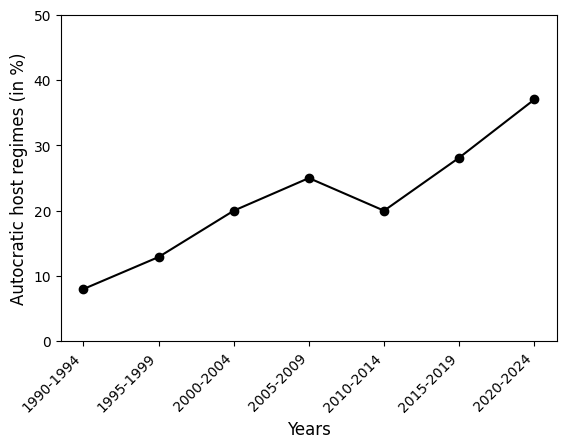

In [10]:
five_year_intervals = [
    '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2024'
]

fig, ax = plt.subplots()

ax.plot(fig_1.postcwy, fig_1.autochostperc, '-ko')
ax.set_xticks(fig_1.postcwy)
ax.set_xticklabels(five_year_intervals)
fig.autofmt_xdate(rotation=45)
ax.set_ylim(0, 50)
ax.set_xlabel('Years', size=12)
ax.set_ylabel('Autocratic host regimes (in %)', size=12)

plt.show()

---

- We will now read the data needed to replicate the Figure SI.1.1. of the Supporting Information.
- The data are available for download at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I.

In [11]:
fig_si11 = pd.read_csv('data/figure_SI11_data.tab', sep='\t')
fig_si11

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


- The Figure SI.1.1. shows all host regimes of the most prominent international sports events since 1945. Black and grey spikes indicate autocratic and democratic host regimes, respectively. Sports events are ordered according to the share of autocratic hosts from highest (top) to lowest (bottom).

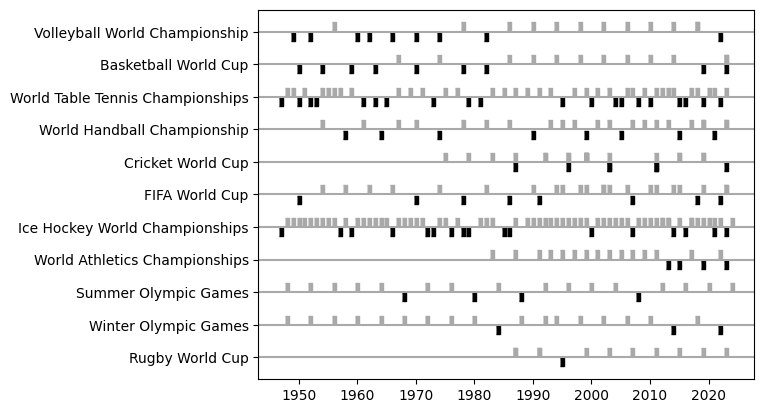

In [12]:
sport_events = [
    'Rugby World Cup', 'Winter Olympic Games', 'Summer Olympic Games', 'World Athletics Championships',
    'Ice Hockey World Championships', 'FIFA World Cup', 'Cricket World Cup', 'World Handball Championship',
    'World Table Tennis Championships', 'Basketball World Cup', 'Volleyball World Championship'
]

verts = [[-0.5, -1], [0.5, -1], [0.5, 1], [-0.5, 1]]
plt.scatter(fig_si11.year, fig_si11.democ - 0.1, marker=verts, color='darkgray')
plt.scatter(fig_si11.year, fig_si11.autoc + 0.1, marker=verts, color='black')
for baseline in fig_si11.baseline.unique():
    plt.axhline(baseline, color='darkgray')
plt.yticks(fig_si11.baseline.unique(), sport_events)
plt.show()

## Q2: Repression in Departments with and without Host Cities

In recent years international sport events have become increasingly attractive to autocratic regimes due to the huge global media attention that accompanies them. However, for autocratic regimes hosting international tournaments also entails risks, because foreign journalists may expose them and make them lose their legitimacy. The authors believe that autocracies strategically adjust repression according to the spatial-temporal presence of international media in order to benefit from the publicity of international sports events without risking to lose the control. 

The authors formulated two hypotheses:

* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tourna- ment, state repression drops in host cities but remains unchanged in other cities.

Figure 4. from the main paper shows that the descriptive evidence (from the actual data) acquiesces the hypotheses of the authors. However, the authors used a series of regression analyses to quantitatively support their hypotheses. More specifically they chose to use negative binomial regression models because they effectively model over-dispersed (the variance of the data is high compared to the mean) count data (the daily repression events in our case). Also, the authors used (OLS) regression models to perform a robustness test to check whether the main results depend on the choice of regression method (the results of which can be found in  Table SI.4.1).

<img src='media/Figure_4.png' alt='Figure 4' style='width: 400px;'/>

For the second question, we will have to replicate and interpret the results of columns (1) - (3) in Table SI.4.1. of the Supporting Information.

![graph](media/Table_SI41.png)

- The Supporting Information can be found [here](https://static.cambridge.org/content/id/urn:cambridge.org:id:article:S0003055422000958/resource/name/S0003055422000958sup001.pdf).

---

- The first model that corresponds to the (1) column of the Table SI.4.1. is:

$$
\ln(\mathrm{repression + 1}) = \beta_0 + \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} + \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2}
$$

- The dependent variable is `lnrepression` which is the logarithmized version of the `repression` variable, which counts the daily number of all recorded disappearances and killings within each department.
- The variable `hostcity` indicates whether a given department includes a host city (coded as 1) or not (coded as 0).
- The variable `time` is a running number of days, starting from March 1 through June 25.
- The variable `time2` is the quadratic term of `time` and it accounts for the inverted U-shaped relationship stated by Hypotheses 1 and 2.
- The variable `hostcity:time` is the interaction of `hostcity` with `time`.
- The variable `hostcity:time2` is the intaraction of `hostcity` with `time2`.

In [13]:
first_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2",
                    data=df)
first_mod_res = first_mod.fit(cov_type='HC1')

---

- The second model that corresponds to the (2) column of the Table SI.4.1. is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = \beta_0 &+ \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} \\
&+ \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2} \\
&+ \beta_6 \times \mathrm{lnpop\_1970} + \beta_7 \times \mathrm{vote\_frejuli} \\
&+ \beta_8 \times \mathrm{literacy\_avg} + \beta_9 \times \mathrm{lnrebact1974} \\
&+ \beta_{10} \times \mathrm{lnrepression70\_77}
\end{align}
$$

The second model contains all the variables (dependent and independent) of the first model plus the following confounding factors that might have affected both the selection of host cities at the end of 1974 and repression patterns across departments in 1978:
- `lnpop_1970` is the logarithmized population size at 1970 and it is included to capture differences in the potential breeding ground for subversion.
- `vote_frejuli` is the peronist vote share in the 1973 elections and it is included as the selection of host cities might have been influenced by visible opposition to the dictatorship.
- `literacy_avg` is the average literacy rate at 1970 and it is included as a proxy for socioeconomic composition.
- `lnrebact1974` is the logarithmized rebel activity at 1974.
- `lnrepression70_77` is the logarithmized history of state repression between 1970-1977.

In [14]:
second_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77",
                     data=df)
second_mod_res = second_mod.fit(cov_type='HC1')

---

- The third model that corresponds to the (3) column of the Table SI.4.1. is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = \beta_0 &+ \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} \\
&+ \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2} \\
&+ \beta_6 \times \mathrm{lnpop\_1970} + \beta_7 \times \mathrm{vote\_frejuli} \\
&+ \beta_8 \times \mathrm{literacy\_avg} + \beta_9 \times \mathrm{lnrebact1974} \\
&+ \beta_{10} \times \mathrm{lnrepression70\_77} + \beta_{11} \times \mathrm{zone1} \\
&+ \beta_{12} \times \mathrm{zone2} + \beta_{13} \times \mathrm{zone3} + \beta_{14} \times \mathrm{zone4}
\end{align}
$$

The third model contains all the variables (dependent and independent) of the second model plus the fixed effects for military zones to control for subnational features of Argentina’s repressive system. We will exclude `zone5` to avoid dummy variable trap as `zone1` - `zone5` are dummy variables. 

In [15]:
third_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone1 + zone2 + zone3 + zone4",
                    data=df)
third_mod_res = third_mod.fit(cov_type='HC1')

---

### Model explanation

- Before explaining the results of each model for the robustness test, I think it is as important to explain why the authors chose these specific models. Moreover, I will explain how the authors expect these models to fit the data in order to corroborate with their hypotheses, which is common among the models.


- The `lnrepression` was used as the dependent variable for the robustness test to improve model fit, which is the log-transformed version of `repression` ($lnrepression = \ln(\mathrm{repression + 1})$). However, for convenience i will explain the concepts as if `repression` has been used.


- The authors anticipate a non-linear inverted U-shaped relationship between daily repression events and time in the host cities, while they anticipate no change in the other cities.


- One of the main assumptions of linear regression is that the relationship between the dependent and the independent variables is linear. If this assumption is not met, linear regression is a poor fit for the data. To overcome this issue, we can include a quadratic term in the model to make it more flexible so that it can model a curve. Since the authors hypothesize that the relationship between daily repression events and time has an inverted U shape, they included the `time2` independent variable to the model.


- However, we want the relationship between daily repression events and time to be dependent on whether the city is a host city or not, becaused as mentioned in the beggining the U-shaped relationship is anticipated only for the five host cities. When a third variable influences the relationship between an independent and dependent variable, we should incorporate in our model the interaction term of the third variable with the independent variable. Because the authors hypothesize that `hostcity` influences the effects of `time` & `time2` on `lnrepression` they added to the model the interaction terms `hostcity:time` & `hostcity:time2`.


- When our model contains a quadratic term and the coefficient of the linear term is positive and the coefficient of the quadratic term is negative, the slope is initially positive, but it decreases as time increases (inverted U-shaped relationship). In our case, we are intrested in the coefficients of `hostcity:time` & `hostcity:time2` as we anticipate this inverted U-shaped relationship to occur only when the city is one of the five host cities and since the `hostcity` is a binary variable, the effect of the interaction terms `hostcity:time` & `hostcity:time2` will only be applied to the host cities. 


- When the coeffient of an interaction term is statistically significant (at a predetermined significance level) it means that there is evidence that a synergy effect exists between the variables that is more powerfull than the sum of their individual effects. In models that contain interaction terms we can no longer analyze in isolation the effect of the interacted variables, as their effect also depends on the value of the variables they interact with.


- Thus, if the coefficient of `hostcity:time` is positive and statistically significant while the coefficient of `hostcity:time2` is negative and statistically significant, this will indicate that the effect of time in daily repression events for the host cities is increasing in the run-up to the world cup but at some point it starts to decrease as we are getting closer to the start of the world cup (while this doesn't affect the other cities as the interaction terms cancel out - hostcity = 0).

---

In [16]:
first_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.90
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.31e-13
Time:                        00:20:57   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0026      0.001      4.027      0.000       0.001       0.004
hostcity           0.0202      0.034      0.591      0.554      -0.047       0.087
time              -0.0028      0.002     -1.233      0.218      -0.007       0.002
time2              0.0020      0.002      1.132      0.258      -0.001       0.006
hostcity:time      0.4012      0.144      2.780      0.005       0.118       0.684
hostcity:time2    -0.3230      0.110     -2.923      0.003      -0.540      -0.106
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

- The first model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = 0.003 &+ 0.020 \times \mathrm{hostcity} - 0.003 \times \mathrm{time} + 0.002 \times \mathrm{time2} \\
&+ 0.401 \times \textrm{hostcity:time} - 0.323 \times \textrm{hostcity:time2}
\end{align}
$$

- We can see that the coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). So, for the reasons mentioned above, the robustness test can be considered successful.


- Notice also that the robust standard errors of the interaction terms are a little bit high. This happens because one disadvantage of adding quadratic terms to the model is that the linear and quadratic terms will be correlated.

---

In [17]:
second_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.16e-32
Time:                        00:20:57   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0041      0.002     -2.056      0.040      -0.008      -0.000
hostcity             -0.0037      0.034     -0.109      0.913      -0.070       0.063
time                 -0.0030      0.002     -1.297      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
hostcity:time         0.4014      0.143      2.801      0.005       0.121       0.682
hostcity:time2       -0.3231      0.110     -2.945      0.003      -0.538      -0.108
lnpop_1970            0.0010      0.000      4.623      0.000       0.001       0.001
vote_frejuli       -3.22e-05   1.86e-05     -1.727      0.084   -6.87e-05    4.34e-06
literacy_avg         -0.0056      0.001     -5.192      0.000      -0.008      -0.003
lnrebact1974         -0.0001      0.000     -0.939      0.348      -0.000       0.000
lnrepression70_77     0.0041      0.000     10.816      0.000       0.003       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693274.776
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The second model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = - 0.004 &- 0.004 \times \mathrm{hostcity} - 0.003 \times \mathrm{time} + 0.002 \times \mathrm{time2} \\
&+ 0.401 \times \textrm{hostcity:time} - 0.323 \times \textrm{hostcity:time2} \\
&+ 0.001 \times \mathrm{lnpop\_1970} - 0.00003 \times \mathrm{vote\_frejuli} \\
&- 0.006 \times \mathrm{literacy\_avg} - 0.0001 \times \mathrm{lnrebact1974} \\
&+ 0.004 \times \mathrm{lnrepression70\_77}
\end{align}
$$

- We can see that the inclusion of the control variables to account for potential confounders did not affect the results. The coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) retained their size, are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). There are also the coefficients $\beta_6$, $\beta_8$ & $\beta_{10}$ that are statistically significant but not substantive significant (their magnitudes are negligible). We can consider the second robustness test successful as well.

---

In [18]:
third_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.72e-31
Time:                        00:20:57   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0132      0.003     -4.804      0.000      -0.019      -0.008
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
hostcity:time         0.4014      0.142      2.825      0.005       0.123       0.680
hostcity:time2       -0.3231      0.109     -2.969      0.003      -0.536      -0.110
lnpop_1970            0.0033      0.000      7.884      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.286      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.267      0.000       0.002       0.004
zone1                 0.0092      0.001      9.207      0.000       0.007       0.011
zone2                -0.0054      0.001     -8.734      0.000      -0.007      -0.004
zone3                -0.0024      0.000     -5.234      0.000      -0.003      -0.002
zone4                 0.0011      0.004      0.305      0.760      -0.006       0.008
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.905
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The third model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = - 0.013 &- 0.004 \times \mathrm{hostcity} - 0.003 \times \mathrm{time} + 0.002 \times \mathrm{time2} \\
&+ 0.401 \times \textrm{hostcity:time} - 0.323 \times \textrm{hostcity:time2} \\
&+ 0.003 \times \mathrm{lnpop\_1970} + 0.00001 \times \mathrm{vote\_frejuli} \\
&- 0.023 \times \mathrm{literacy\_avg} - 0.001 \times \mathrm{lnrebact1974} \\
&+ 0.003 \times \mathrm{lnrepression70\_77} + 0.009 \times \mathrm{zone1} \\
&- 0.005 \times \mathrm{zone2} - 0.002 \times \mathrm{zone3} + 0.001 \times \mathrm{zone4}
\end{align}
$$

- We can see from the summary of the third model that the inclusion of the control variables to account for subnational features of Argentina’s repressive system did not affect the results. The coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) retained their size, are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). There are also the coefficients $\beta_6$, $\beta_8$, $\beta_9$, $\beta_{10}$, $\beta_{11}$, $\beta_{12}$ & $\beta_{13}$ that are statistically significant but not substantive significant (their magnitudes are negligible). We can consider the third robustness test successful as well.

## Q3: Graphical Overview of Effects

For the third question, we will have to replicate and interpret the results of the Figure 5 of the main paper. However, we will use the third model defined in Q2 instead of the Model 3 from the Table 1 used in the main paper. Also, we will have to enrich the figure by plotting relevant information from the actual data (not predictions).

<img src="media/Figure_5.png" alt="Figure 4" style="width: 801px;"/>

---

- Figure 5 consists of two diagrams, the first for the host cities and the second for the other cities.
- We will create a new DataFrame called `host_cities` that will contain the records of the host cities.
- We will create a new DataFrame called `other_cities` that will contain the records of the other cities.

In [19]:
model_variables = [
    'lnrepression', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg',
    'lnrebact1974', 'lnrepression70_77', 'zone1', 'zone2', 'zone3', 'zone4'
]

host_cities = df[df.hostcity == 1].copy().dropna(subset=model_variables)
other_cities = df[df.hostcity == 0].copy().dropna(subset=model_variables)

- We will use the `get_prediction()` method, passing as input the `host_cities` DataFrame, to get the predicted values (mean) and the 95% confidence intervals (mean_ci_lower & mean_ci_upper) arising from the third model defined in Q2 and store them in a new DataFrame called `host_pred_repr`.
- Then we will add the `time` column to the `host_pred_repr` DataFrame and group by it to get the mean number of predicted lnrepression events for each day across the host cities.

In [20]:
host_pred_repr = third_mod_res.get_prediction(host_cities).summary_frame()
host_pred_repr['time'] = host_cities.time.values
host_pred_repr = host_pred_repr.groupby(by='time').mean().reset_index()
host_pred_repr

,time,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.01,0.026707,0.032318,-0.036635,0.090050,-0.092941,0.146356
1,0.02,0.030595,0.031134,-0.030426,0.091616,-0.087841,0.149031
2,0.03,0.034419,0.029983,-0.024347,0.093184,-0.082872,0.151709
3,0.04,0.038178,0.028867,-0.018400,0.094755,-0.078031,0.154387
4,0.05,0.041873,0.027786,-0.012586,0.096332,-0.073320,0.157066
...,...,...,...,...,...,...,...
112,1.13,0.063141,0.020857,0.022262,0.104020,-0.046288,0.172571
113,1.14,0.059840,0.021499,0.017702,0.101978,-0.050066,0.169746
114,1.15,0.056474,0.022189,0.012985,0.099964,-0.053957,0.166906
115,1.16,0.053045,0.022925,0.008112,0.097978,-0.057963,0.164052


- We will use the `get_prediction()` method, passing as input the `other_cities` DataFrame, to get the predicted values (mean) and the 95% confidence intervals (mean_ci_lower & mean_ci_upper) arising from the third model defined in Q2 and store them in a new DataFrame called `other_pred_repr`.
- Then we will add the `time` column to the `other_pred_repr` DataFrame and group by it to get the mean number of predicted lnrepression events for each day across the other cities.

In [21]:
other_pred_repr = third_mod_res.get_prediction(other_cities).summary_frame()
other_pred_repr['time'] = other_cities.time.values
other_pred_repr = other_pred_repr.groupby(by='time').mean().reset_index()
other_pred_repr

,time,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.01,0.002634,0.000951,0.000771,0.004498,-0.098894,0.104163
1,0.02,0.002605,0.000936,0.000771,0.004439,-0.098923,0.104132
2,0.03,0.002575,0.000921,0.000770,0.004381,-0.098952,0.104102
3,0.04,0.002546,0.000907,0.000768,0.004324,-0.098980,0.104073
4,0.05,0.002518,0.000894,0.000766,0.004269,-0.099009,0.104044
...,...,...,...,...,...,...,...
112,1.13,0.001992,0.000826,0.000373,0.003611,-0.099532,0.103516
113,1.14,0.002011,0.000835,0.000374,0.003648,-0.099513,0.103535
114,1.15,0.002030,0.000845,0.000374,0.003687,-0.099495,0.103555
115,1.16,0.002050,0.000856,0.000373,0.003727,-0.099475,0.103575


- We will create the `get_patch()` function to create two path patches to add the gray area that indicates the World Cup period, without having it overlapping with the main diagram.
- We will create the `draw()` function to draw the diagrams.

In [22]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def get_patch(rght_v, left_v, pred, ci, ignored=(0, 0)):
    verts = list(zip(np.linspace(0.93, 1.17, 25), pred[ci].loc[92:])) + [rght_v, left_v, ignored]
    codes = [Path.MOVETO] + [Path.CURVE3]*24 + [Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(verts, codes)
    return PathPatch(path, facecolor='darkgray', alpha=0.1, linewidth=0)

def draw(ax, title, pred, ylim, yticks, annot_pos, top_patch, btm_patch, linestyle='solid', mvg_avg=None):
    ax.set_title(title, size=14)
    ax.plot(pred.time, pred['mean'], color='black', linestyle=linestyle)
    ax.fill_between(pred.time, pred['mean_ci_lower'], pred['mean_ci_upper'], color='darkgray', alpha=.5)
    ax.set_xlim([0.01, 1.17])
    ax.set_xticks([0.01, 0.32, 0.62, 0.93, 1.17])
    ax.set_xticklabels(['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.add_patch(top_patch)
    ax.add_patch(btm_patch)
    ax.annotate('World Cup', annot_pos, size=12)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_ylabel('Predicted number of daily lnrepression events', size=12)

    if mvg_avg is not None:
        ax.plot(pred.time, mvg_avg, color='black')

- We will draw the Figure 5 (using our own model).

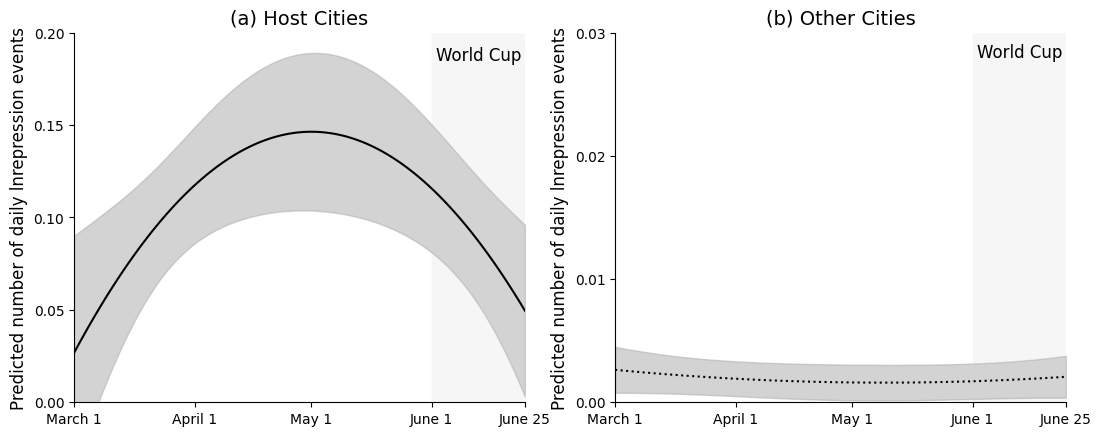

In [23]:
fig, (host_ax, other_ax) = plt.subplots(1, 2, figsize=(12.8, 4.8))

host_title = '(a) Host Cities'
host_ylim = [0, 0.2]
host_yticks = [0, 0.05, 0.1, 0.15, 0.2]
host_annot_pos = (0.94, 0.185)
host_top_patch = get_patch((1.17, 0.2), (0.93, 0.2), host_pred_repr, 'mean_ci_upper')  # top_rght, top_lft
host_btm_patch = get_patch((1.17, 0), (0.93, 0), host_pred_repr, 'mean_ci_lower')  # btm_rght, btm_lft

other_title = '(b) Other Cities'
other_ylim = [0, 0.03]
other_yticks = [0, 0.01, 0.02, 0.03]
other_annot_pos = (0.94, 0.028)
other_top_patch = get_patch((1.17, 0.03), (0.93, 0.03), other_pred_repr, 'mean_ci_upper')  # top_rght, top_lft
other_btm_patch = get_patch((1.17, 0), (0.93, 0), other_pred_repr, 'mean_ci_lower')  # btm_rght, btm_lft

draw(host_ax, host_title, host_pred_repr, host_ylim, host_yticks, host_annot_pos, host_top_patch, host_btm_patch)
draw(other_ax, other_title, other_pred_repr, other_ylim, other_yticks, other_annot_pos, other_top_patch, other_btm_patch, linestyle='dotted')

The model we used to create the diagram has `lnrepression` as its dependent variable and for that reason the range of values in the y-axis is different. Moreover, it is generally not recommended to log-transform count data, which is also the reason that the main analysis was conducted using negative binomial regression (or perhaps zero-inflated negative binomial regression as our dependent variable contains excessive zeros). Thus, our model that uses OLS regression with log-transformed dependent variable does not fit the data well enough and for that reason, the shape of our diagram is a little bit different than Figure 5 of the paper.

---

- We will group by `time` and compute the mean number of daily lnrepression events across host cities (just like we did with the predictions).
- We will compute the five-day moving average using the `rolling()` method that helps us to make calculations on a rolling window, and then get the mean for each window.

In [24]:
host_mvg_avg = host_cities[['time', 'lnrepression']].groupby(by='time').mean().reset_index()
host_mvg_avg['mvg_avg'] = host_mvg_avg.lnrepression.rolling(5).mean()
host_mvg_avg = host_mvg_avg.bfill()
host_mvg_avg

,time,lnrepression,mvg_avg
0,0.01,0.138629,0.138629
1,0.02,0.138629,0.138629
2,0.03,0.138629,0.138629
3,0.04,0.138629,0.138629
4,0.05,0.138629,0.138629
...,...,...,...
112,1.13,0.000000,0.000000
113,1.14,0.000000,0.000000
114,1.15,0.000000,0.000000
115,1.16,0.000000,0.000000


- We will group by `time` and compute the mean number of daily lnrepression events across the other cities (just like we did with the predictions).
- We will compute the five-day moving average using the `rolling()` method that helps us to make calculations on a rolling window, and then get the mean for each window.

In [25]:
other_mvg_avg = other_cities[['time', 'lnrepression']].groupby(by='time').mean().reset_index()
other_mvg_avg['mvg_avg'] = other_mvg_avg.lnrepression.rolling(5).mean()
other_mvg_avg = other_mvg_avg.bfill()
other_mvg_avg

,time,lnrepression,mvg_avg
0,0.01,0.007513,0.002956
1,0.02,0.002906,0.002956
2,0.03,0.002906,0.002956
3,0.04,0.001453,0.002956
4,0.05,0.000000,0.002956
...,...,...,...
112,1.13,0.000000,0.001914
113,1.14,0.001453,0.001914
114,1.15,0.002303,0.002374
115,1.16,0.002303,0.002544


- We will draw the Figure 5 (using our own model) enriched with the five-day moving average of the mean number of daily lnrepression events from the actual data.
- I chose to include the actual data using the five-day moving average because it makes it easier for us to observe the overall pattern of the actual data. 


Note: the moving average is computed differently than Figure 4 of the main paper. The moving average is computed on the mean number of daily lnrepression events, whereas on Figure 4 it is computed on the total count of daily repression events. This happens because the graphs are also based on the mean number of daily lnrepression events.

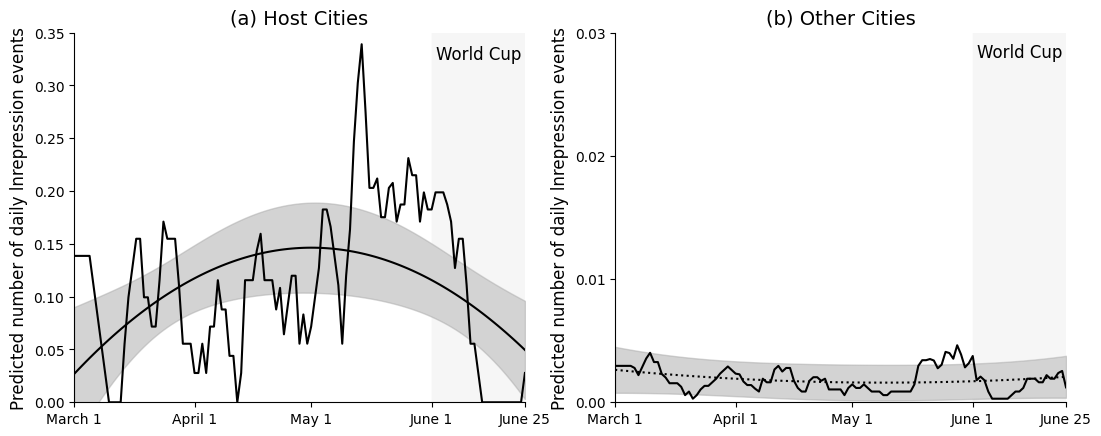

In [26]:
fig, (host_ax, other_ax) = plt.subplots(1, 2, figsize=(12.8, 4.8))

host_title = '(a) Host Cities'
host_ylim = [0, 0.35]
host_yticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
host_annot_pos = (0.94, 0.325)
host_top_patch = get_patch((1.17, 0.35), (0.93, 0.35), host_pred_repr, 'mean_ci_upper')  # top_rght, top_lft
host_btm_patch = get_patch((1.17, 0), (0.93, 0), host_pred_repr, 'mean_ci_lower')  # btm_rght, btm_lft

other_title = '(b) Other Cities'
other_ylim = [0, 0.03]
other_yticks = [0, 0.01, 0.02, 0.03]
other_annot_pos = (0.94, 0.028)
other_top_patch = get_patch((1.17, 0.03), (0.93, 0.03), other_pred_repr, 'mean_ci_upper')  # top_rght, top_lft
other_btm_patch = get_patch((1.17, 0), (0.93, 0), other_pred_repr, 'mean_ci_lower')  # btm_rght, btm_lft

draw(host_ax, host_title, host_pred_repr, host_ylim, host_yticks, host_annot_pos, host_top_patch, host_btm_patch, mvg_avg=host_mvg_avg.mvg_avg)
draw(other_ax, other_title, other_pred_repr, other_ylim, other_yticks, other_annot_pos, other_top_patch, other_btm_patch, linestyle='dotted', mvg_avg=other_mvg_avg.mvg_avg)

- We can see that the mean state violence is consistently higher across host cities compared to the other cities, both from the model predictions and the raw data.
- Also, we can see from the raw data that the mean state violence was actually reduced considerably around the middle of the tournament, not before it started.

## Q4: Robustness Check Using a Dichotomous Indicator of Repression

As another robustness test the authors used a series of logistic regressions to check whether the results are robust to potential reporting biases in the dependent variable (the results of which can be found in  Table SI.4.5).

For the third question, we will have to replicate the results in Table SI.4.5. of the Supporting Information.

![graph](media/Table_SI45.png)

- The Supporting Information can be found [here](https://static.cambridge.org/content/id/urn:cambridge.org:id:article:S0003055422000958/resource/name/S0003055422000958sup001.pdf).

---

The first model corresponds to the (1) column of the Table SI.4.5.


- The dependent variable is `dumrepression` which is a re-coded version of the `repression` variable, where all positive counts as coded as 1.
- The variable `hostcity` indicates whether a given department includes a host city (coded as 1) or not (coded as 0).
- The variable `time` is a running number of days, starting from March 1 through June 25.
- The variable `time2` is the quadratic term of `time` and it accounts for the inverted U-shaped relationship stated by Hypotheses 1 and 2.
- The variable `hostcity:time` is the interaction of `hostcity` with `time`.
- The variable `hostcity:time2` is the intaraction of `hostcity` with `time2`.

In [27]:
first_mod = smf.logit("dumrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2",
                      data=df)
first_mod_res = first_mod.fit(cov_type='HC1')
first_mod_res.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.1533
Time:                        00:20:59   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  HC1   LLR p-value:                 4.467e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcity           3.1376      0.576      5.448      0.000       2.009       4.266
time              -0.8733      1.067     -0.818      0.413      -2.966       1.219
time2              0.5355      0.864      0.620      0.535      -1.157       2.228
hostcity:time      4.1403      2.081      1.990      0.047       0.062       8.219
hostcity:time2    -3.2143      1.600     -2.009      0.045      -6.350      -0.078
==================================================================================
"""

The second model that corresponds to the (2) column of the Table SI.4.5. contains all the variables (dependent and independent) of the first model plus the following confounding factors that might have affected both the selection of host cities at the end of 1974 and repression patterns across departments in 1978:
- `lnpop_1970` is the logarithmized population size at 1970 and it is included to capture differences in the potential breeding ground for subversion.
- `vote_frejuli` is the peronist vote share in the 1973 elections and it is included as the selection of host cities might have been influenced by visible opposition to the dictatorship.
- `literacy_avg` is the average literacy rate at 1970 and it is included as a proxy for socioeconomic composition.
- `lnrebact1974` is the logarithmized rebel activity at 1974.
- `lnrepression70_77` is the logarithmized history of state repression between 1970-1977.

In [28]:
second_mod = smf.logit("dumrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77",
                       data=df)
second_mod_res = second_mod.fit(cov_type='HC1')
second_mod_res.summary()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.4027
Time:                        00:20:59   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                1.601e-219
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcity             -1.6274      0.628     -2.591      0.010      -2.859      -0.396
time                 -0.9927      1.088     -0.912      0.362      -3.126       1.140
time2                 0.6181      0.882      0.701      0.484      -1.111       2.347
hostcity:time         4.8685      2.119      2.297      0.022       0.715       9.023
hostcity:time2       -3.7977      1.647     -2.305      0.021      -7.026      -0.569
lnpop_1970            0.8683      0.224      3.875      0.000       0.429       1.308
vote_frejuli          0.0061      0.014      0.450      0.653      -0.020       0.033
literacy_avg         -0.2055      3.172     -0.065      0.948      -6.422       6.011
lnrebact1974          0.0486      0.078      0.626      0.531      -0.104       0.201
lnrepression70_77     0.5776      0.141      4.100      0.000       0.301       0.854
=====================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The third model that corresponds to the (3) column of the Table SI.4.5. contains all the variables (dependent and independent) of the second model plus the fixed effects for military zones to control for subnational features of Argentina’s repressive system. We will exclude `zone5` to avoid dummy variable trap as `zone1` - `zone5` are dummy variables. 

In [29]:
third_mod = smf.logit("dumrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone1 + zone2 + zone3 + zone4",
                      data=df)
third_mod_res = third_mod.fit(cov_type='HC1')
third_mod_res.summary()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Mon, 16 Jan 2023   Pseudo R-squ.:                  0.4138
Time:                        00:20:59   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC1   LLR p-value:                9.017e-222
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -16.1883      3.238     -4.999      0.000     -22.535      -9.842
hostcity             -1.3273      0.690     -1.924      0.054      -2.679       0.025
time                 -0.9924      1.086     -0.914      0.361      -3.121       1.136
time2                 0.6179      0.880      0.702      0.483      -1.107       2.343
hostcity:time         5.3781      2.267      2.373      0.018       0.935       9.821
hostcity:time2       -4.2173      1.774     -2.378      0.017      -7.694      -0.741
lnpop_1970            0.7459      0.215      3.470      0.001       0.325       1.167
vote_frejuli          0.0200      0.015      1.323      0.186      -0.010       0.050
literacy_avg         -0.1268      3.041     -0.042      0.967      -6.088       5.834
lnrebact1974         -0.1315      0.080     -1.635      0.102      -0.289       0.026
lnrepression70_77     0.5452      0.155      3.519      0.000       0.242       0.849
zone1                 0.7864      0.485      1.623      0.105      -0.163       1.736
zone2                -1.2127      0.651     -1.863      0.062      -2.489       0.063
zone3                -0.1967      0.553     -0.356      0.722      -1.281       0.887
zone4                 0.6238      0.516      1.209      0.227      -0.388       1.635
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Q5: Robustness Check Using Matched Samples

Another robustness check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both manually and algorithmically. We will focus on the simple, manual matching. The manual matching procedure uses the range of Population size (min–max) of all departments with host cities to select those departments without host cities into the control group. The sample thus excludes small, sparsely populated departments.

For the fifth question, we will have to replicate and interpret the results of columns (1) - (3) of Table SI.4.7. of the Supporting Information and recreate Figure 6 of the main paper using OLS.

![graph](media/Table_SI47.png)

<img src="media/Figure_6.png" alt="Figure 6" style="width: 400px;"/>

- The Supporting Information can be found [here](https://static.cambridge.org/content/id/urn:cambridge.org:id:article:S0003055422000958/resource/name/S0003055422000958sup001.pdf).

---

Note: the models are the same as in Q2, the data that the models are fitted to are different.

---

- The first model that corresponds to the (1) column of the Table SI.4.7. is:

$$
\ln(\mathrm{repression + 1}) = \beta_0 + \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} + \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2}
$$

- The dependent variable is `lnrepression` which is the logarithmized version of the `repression` variable, which counts the daily number of all recorded disappearances and killings within each department.
- The variable `hostcity` indicates whether a given department includes a host city (coded as 1) or not (coded as 0).
- The variable `time` is a running number of days, starting from March 1 through June 25.
- The variable `time2` is the quadratic term of `time` and it accounts for the inverted U-shaped relationship stated by Hypotheses 1 and 2.
- The variable `hostcity:time` is the interaction of `hostcity` with `time`.
- The variable `hostcity:time2` is the intaraction of `hostcity` with `time2`.

In [30]:
first_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2",
                    data=df[df.matched_simple == 1])
first_mod_res = first_mod.fit(cov_type='HC1')
first_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.554
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.53e-08
Time:                        00:20:59   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0292      0.008      3.446      0.001       0.013       0.046
hostcity          -0.0064      0.035     -0.182      0.856      -0.075       0.063
time              -0.0255      0.031     -0.810      0.418      -0.087       0.036
time2              0.0196      0.025      0.785      0.433      -0.029       0.068
hostcity:time      0.4239      0.148      2.868      0.004       0.134       0.714
hostcity:time2    -0.3405      0.113     -3.005      0.003      -0.563      -0.118
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

- The first model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = 0.029 &- 0.006 \times \mathrm{hostcity} - 0.025 \times \mathrm{time} + 0.020 \times \mathrm{time2} \\
&+ 0.424 \times \textrm{hostcity:time} - 0.340 \times \textrm{hostcity:time2}
\end{align}
$$

- We can see that the coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). So, for the same reasons [mentioned in Q2](#Model-explanation), the robustness test can be considered successful.


- Notice also that the robust standard errors of the interaction terms are a little bit high. This happens because one disadvantage of adding quadratic terms to the model is that the linear and quadratic terms will be correlated.

---

- The second model that corresponds to the (2) column of the Table SI.4.1. is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = \beta_0 &+ \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} \\
&+ \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2} \\
&+ \beta_6 \times \mathrm{lnpop\_1970} + \beta_7 \times \mathrm{vote\_frejuli} \\
&+ \beta_8 \times \mathrm{literacy\_avg} + \beta_9 \times \mathrm{lnrebact1974} \\
&+ \beta_{10} \times \mathrm{lnrepression70\_77}
\end{align}
$$

The second model contains all the variables (dependent and independent) of the first model plus the following confounding factors that might have affected both the selection of host cities at the end of 1974 and repression patterns across departments in 1978:
- `lnpop_1970` is the logarithmized population size at 1970 and it is included to capture differences in the potential breeding ground for subversion.
- `vote_frejuli` is the peronist vote share in the 1973 elections and it is included as the selection of host cities might have been influenced by visible opposition to the dictatorship.
- `literacy_avg` is the average literacy rate at 1970 and it is included as a proxy for socioeconomic composition.
- `lnrebact1974` is the logarithmized rebel activity at 1974.
- `lnrepression70_77` is the logarithmized history of state repression between 1970-1977.

In [31]:
second_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77",
                     data=df[df.matched_simple == 1])
second_mod_res = second_mod.fit(cov_type='HC1')
second_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.90
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.82e-22
Time:                        00:20:59   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9371      0.141     -6.668      0.000      -1.213      -0.662
hostcity             -0.1001      0.035     -2.896      0.004      -0.168      -0.032
time                 -0.0255      0.031     -0.817      0.414      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
hostcity:time         0.4239      0.135      3.132      0.002       0.159       0.689
hostcity:time2       -0.3405      0.105     -3.250      0.001      -0.546      -0.135
lnpop_1970            0.0867      0.011      8.218      0.000       0.066       0.107
vote_frejuli         -0.0014      0.001     -2.732      0.006      -0.002      -0.000
literacy_avg          0.0089      0.087      0.102      0.919      -0.162       0.180
lnrebact1974         -0.0049      0.002     -2.790      0.005      -0.008      -0.001
lnrepression70_77    -0.0029      0.002     -1.296      0.195      -0.007       0.002
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.735
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The second model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = - 0.937 &- 0.100 \times \mathrm{hostcity} - 0.025 \times \mathrm{time} + 0.020 \times \mathrm{time2} \\
&+ 0.424 \times \textrm{hostcity:time} - 0.340 \times \textrm{hostcity:time2} \\
&+ 0.087 \times \mathrm{lnpop\_1970} - 0.001 \times \mathrm{vote\_frejuli} \\
&+ 0.009 \times \mathrm{literacy\_avg} - 0.005 \times \mathrm{lnrebact1974} \\
&- 0.003 \times \mathrm{lnrepression70\_77}
\end{align}
$$

- We can see that the inclusion of the control variables to account for potential confounders did not affect the results. The coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) retained their size, are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). Moreover, the coefficient $\beta_1$ is statistically significant in the opposite of the expected direction, however, because `hostcity` is interacted with both `time` & `time2`, its separate effect on the outcome should not be considered in isolation. There are also the coefficients $\beta_6$, $\beta_7$ & $\beta_9$ that are statistically significant but not substantive significant (their magnitudes are negligible). We can consider the second robustness test successful as well.

---

- The third model that corresponds to the (3) column of the Table SI.4.1. is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = \beta_0 &+ \beta_1 \times \mathrm{hostcity} + \beta_2 \times \mathrm{time} + \beta_3 \times \mathrm{time2} \\
&+ \beta_4 \times \textrm{hostcity:time} + \beta_5 \times \textrm{hostcity:time2} \\
&+ \beta_6 \times \mathrm{lnpop\_1970} + \beta_7 \times \mathrm{vote\_frejuli} \\
&+ \beta_8 \times \mathrm{literacy\_avg} + \beta_9 \times \mathrm{lnrebact1974} \\
&+ \beta_{10} \times \mathrm{lnrepression70\_77} + \beta_{11} \times \mathrm{zone1} \\
&+ \beta_{12} \times \mathrm{zone2} + \beta_{13} \times \mathrm{zone3} + \beta_{14} \times \mathrm{zone4}
\end{align}
$$

The third model contains all the variables (dependent and independent) of the second model plus the fixed effects for military zones to control for subnational features of Argentina’s repressive system. We will exclude `zone5` to avoid dummy variable trap as `zone1` - `zone5` are dummy variables. 

In [32]:
third_mod = smf.ols("lnrepression ~ hostcity + time + time2 + hostcity:time + hostcity:time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone1 + zone2 + zone3 + zone4",
                    data=df[df.matched_simple == 1])
third_mod_res = third_mod.fit(cov_type='HC1')
third_mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           9.72e-24
Time:                        00:20:59   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0465      0.172     -6.093      0.000      -1.383      -0.710
hostcity             -0.0766      0.033     -2.347      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.789      0.430      -0.029       0.068
hostcity:time         0.4239      0.131      3.241      0.001       0.168       0.680
hostcity:time2       -0.3405      0.102     -3.344      0.001      -0.540      -0.141
lnpop_1970            0.0872      0.011      7.761      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.575      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.045      0.041       0.009       0.410
lnrebact1974         -0.0204      0.003     -6.641      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.168      0.000      -0.024      -0.008
zone1                 0.0682      0.010      6.635      0.000       0.048       0.088
zone2                -0.0413      0.010     -4.171      0.000      -0.061      -0.022
zone3                -0.0175      0.007     -2.347      0.019      -0.032      -0.003
zone4                 0.0520      0.009      5.767      0.000       0.034       0.070
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The third model after fitting is:

$$
\begin{align}
\ln(\mathrm{repression + 1}) = - 1.046 &- 0.077 \times \mathrm{hostcity} - 0.025 \times \mathrm{time} + 0.020 \times \mathrm{time2} \\
&+ 0.424 \times \textrm{hostcity:time} - 0.340 \times \textrm{hostcity:time2} \\
&+ 0.087 \times \mathrm{lnpop\_1970} - 0.0009 \times \mathrm{vote\_frejuli} \\
&+ 0.209 \times \mathrm{literacy\_avg} - 0.020 \times \mathrm{lnrebact1974} \\
&- 0.016 \times \mathrm{lnrepression70\_77} + 0.068 \times \mathrm{zone1} \\
&- 0.040 \times \mathrm{zone2} - 0.017 \times \mathrm{zone3} + 0.052 \times \mathrm{zone4}
\end{align}
$$

- We can see from the summary of the third model that the inclusion of the control variables to account for subnational features of Argentina’s repressive system did not affect the results. The coefficients of both the interaction terms ($\beta_4$ & $\beta_5$) retained their size, are in the expected direction and statistically significant $(P < 0.01)$ at a significance level of 1% (which has been predetermined by the authors). There are also the coefficients $\beta_6$, $\beta_9$, $\beta_{10}$, $\beta_{11}$, $\beta_{12}$ & $\beta_{14}$ that are statistically significant but not substantive significant (their magnitudes are negligible). We can consider the third robustness test successful as well.

---

- Figure 6 contains two graphs, the solid line graph corresponds to the host cities and the dotted line graph corresponds to the other cities.
- We will create a new DataFrame called `host_cities` that will contain the records of the host cities (experimental group).
- We will create a new DataFrame called `other_cities` that will contain the records of the other cities included in the matched sample (control group).

In [33]:
model_variables = [
    'lnrepression', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg',
    'lnrebact1974', 'lnrepression70_77', 'zone1', 'zone2', 'zone3', 'zone4'
]

host_cities = df[df.hostcity == 1].copy().dropna(subset=model_variables)
other_cities = df[(df.matched_simple == 1) & (df.hostcity == 0)].copy().dropna(subset=model_variables)

- We will use the `get_prediction()` method, passing as input the `host_cities` DataFrame, to get the predicted values (mean) and the 95% confidence intervals (mean_ci_lower & mean_ci_upper) arising from the third model and store them in a new DataFrame called `host_pred_repr`.
- Then we will add the `time` column to the `host_pred_repr` DataFrame and group by it to get the mean number of predicted lnrepression events for each day across the host cities.

In [34]:
host_pred_repr = third_mod_res.get_prediction(host_cities).summary_frame()
host_pred_repr['time'] = host_cities.time.values
host_pred_repr = host_pred_repr.groupby(by='time').mean().reset_index()
host_pred_repr

,time,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.01,0.026707,0.030656,-0.033377,0.086791,-0.312584,0.365998
1,0.02,0.030595,0.029684,-0.027584,0.088774,-0.308369,0.369559
2,0.03,0.034419,0.028744,-0.021919,0.090756,-0.304239,0.373076
3,0.04,0.038178,0.027837,-0.016382,0.092737,-0.300194,0.376550
4,0.05,0.041873,0.026963,-0.010974,0.094720,-0.296234,0.379980
...,...,...,...,...,...,...,...
112,1.13,0.063141,0.022474,0.019093,0.107189,-0.273807,0.400090
113,1.14,0.059840,0.023068,0.014628,0.105052,-0.277252,0.396931
114,1.15,0.056474,0.023700,0.010024,0.102925,-0.280775,0.393724
115,1.16,0.053045,0.024369,0.005282,0.100807,-0.284377,0.390467


- We will use the `get_prediction()` method, passing as input the `other_cities` DataFrame, to get the predicted values (mean) and the 95% confidence intervals (mean_ci_lower & mean_ci_upper) arising from the third model and store them in a new DataFrame called `other_pred_repr`.
- Then we will add the `time` column to the `other_pred_repr` DataFrame and group by it to get the mean number of predicted lnrepression events for each day across the other cities.

In [35]:
other_pred_repr = third_mod_res.get_prediction(other_cities).summary_frame()
other_pred_repr['time'] = other_cities.time.values
other_pred_repr = other_pred_repr.groupby(by='time').mean().reset_index()
other_pred_repr

,time,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.01,0.028903,0.010518,0.008288,0.049519,-0.305639,0.363446
1,0.02,0.028654,0.010309,0.008450,0.048859,-0.305863,0.363172
2,0.03,0.028409,0.010106,0.008601,0.048217,-0.306085,0.362903
3,0.04,0.028167,0.009912,0.008740,0.047594,-0.306305,0.362639
4,0.05,0.027930,0.009725,0.008869,0.046990,-0.306522,0.362381
...,...,...,...,...,...,...,...
112,1.13,0.025330,0.009148,0.007400,0.043260,-0.309061,0.359720
113,1.14,0.025519,0.009304,0.007285,0.043754,-0.308887,0.359926
114,1.15,0.025713,0.009467,0.007158,0.044267,-0.308711,0.360136
115,1.16,0.025910,0.009637,0.007021,0.044798,-0.308532,0.360352


- We will draw the Figure 6 (using our own model).

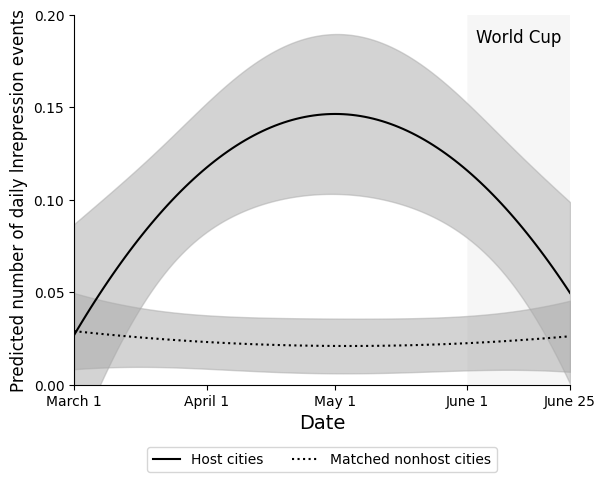

In [36]:
fig, ax = plt.subplots()

ax.plot(host_pred_repr.time, host_pred_repr['mean'], color='black', label='Host cities')
ax.fill_between(host_pred_repr.time, host_pred_repr['mean_ci_lower'], host_pred_repr['mean_ci_upper'], color='darkgray', alpha=.5)

ax.plot(other_pred_repr.time, other_pred_repr['mean'], color='black', linestyle='dotted', label='Matched nonhost cities')
ax.fill_between(other_pred_repr.time, other_pred_repr['mean_ci_lower'], other_pred_repr['mean_ci_upper'], color='darkgray', alpha=.5)

ax.set_xlim([0.01, 1.17])
ax.set_xticks([0.01, 0.32, 0.62, 0.93, 1.17])
ax.set_xticklabels(['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
ax.set_ylim([0, 0.2])
ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
ax.add_patch(get_patch((1.17, 0.2), (0.93, 0.2), host_pred_repr, 'mean_ci_upper')) # top
ax.add_patch(get_patch((1.17, 0), (0.93, 0), host_pred_repr, 'mean_ci_lower')) # bottom
ax.annotate('World Cup', (0.95, 0.185), size=12)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Predicted number of daily lnrepression events', size=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2)

plt.show()

- We can see that the mean state violence is higher across other cities compared to the original sample, however, it remains stable throughout the duration of the research (and below the host cities).